In [1]:
import pandas as pd
from pathlib import Path
import pandas_datareader.data as reader
import datetime as dt
from MCForecastTools import MCSimulation

# For visualizations:
import seaborn as sns

# PART I: DATA CAPTURE AND ORGANIZATION

In [2]:
end = dt.date(2022, 5, 10)
start = dt.date(2022, 1, 1)

ticker1 = ["BTC-USD"]
ticker2 = ["IWP"]  #iShares Russell Mid-Cap GROWTH ETF, a midcap growth fund. Chose midcap to factor out size.
ticker3 = ["IWS"]  #iShares Russell Mid-Cap VALUE ETF, a midcap value fund. Chose midcap to factor out size.
ticker4 = ["MGC"]   #Vanguard Mega Cap ETF, a fund with LARGE CAPS only to feature size (large cap end of the spectrum).
ticker5 = ["IWC"]  #iShares Micro-Cap ETF, a fund with SMALL CAPS only to feature size (small cap end of the spectrum).
ticker6 = ["SPY"]

In [3]:
# Get BTC closing prices

btc_prices = reader.get_data_yahoo(ticker1, start, end)
display(btc_prices.head())
btc_prices.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2022-01-01,47686.812500,47686.812500,47827.312500,46288.484375,46311.746094,2.458267e+10
2022-01-02,47345.218750,47345.218750,47881.406250,46856.937500,47680.925781,2.795157e+10
2022-01-03,46458.117188,46458.117188,47510.726562,45835.964844,47343.542969,3.307163e+10
2022-01-04,45897.574219,45897.574219,47406.546875,45752.464844,46458.851562,4.249468e+10
2022-01-05,43569.003906,43569.003906,46929.046875,42798.222656,45899.359375,3.685108e+10


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2022-05-06,36040.921875,36040.921875,36624.359375,35482.132812,36573.183594,3.779558e+10
2022-05-07,35501.953125,35501.953125,36129.925781,34940.824219,36042.503906,2.437590e+10
2022-05-08,34059.265625,34059.265625,35502.941406,33878.964844,35502.941406,3.676304e+10
2022-05-09,30296.953125,30296.953125,34222.074219,30296.953125,34060.015625,6.335549e+10
2022-05-10,31022.906250,31022.906250,32596.308594,29944.802734,30273.654297,5.981104e+10


In [4]:
btc_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
btc_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2022-01-01,47686.812500,47686.812500,47827.312500,46288.484375,46311.746094,2.458267e+10
2022-01-02,47345.218750,47345.218750,47881.406250,46856.937500,47680.925781,2.795157e+10
2022-01-03,46458.117188,46458.117188,47510.726562,45835.964844,47343.542969,3.307163e+10
2022-01-04,45897.574219,45897.574219,47406.546875,45752.464844,46458.851562,4.249468e+10
2022-01-05,43569.003906,43569.003906,46929.046875,42798.222656,45899.359375,3.685108e+10


In [5]:
btc_prices = btc_prices[["open", "high", "low", "close", "volume", "adj close"]]
btc_prices.drop(columns="adj close", axis=1, inplace=True)
btc_prices.head()

,open,high,low,close,volume
Date,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,2.458267e+10
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,2.795157e+10
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,3.307163e+10
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,4.249468e+10
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,3.685108e+10


In [6]:
btc_only_prices = pd.concat([btc_prices], axis=1, keys=['BTC USD'])
btc_only_prices

BTC USD                                            \
                    open          high           low         close   
Date                                                                 
2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500   
2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750   
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
...                  ...           ...           ...           ...   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-07  36042.503906  36129.925781  34940.824219  35501.953125   
2022-05-08  35502.941406  35502.941406  33878.964844  34059.265625   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   
2022-05-10  30273.654297  32596.308594  29944.802734  31022.906250   

                          
                  volume  
Date                      
2022-01-01  2.458267e+10  
2022-01-02  2.795157e+10  
2022-01-03  3.307163e+10  
2022-01-04  4.249468e+10  
2022-01-05  3.685108e+10  
...                  ...  
2022-05-06  3.779558e+10  
2022-05-07  2.437590e+10  
2022-05-08  3.676304e+10  
2022-05-09  6.335549e+10  
2022-05-10  5.981104e+10  

[130 rows x 5 columns]

In [7]:
iwp_prices = reader.get_data_yahoo(ticker2, start, end)
display(iwp_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWP,IWP,IWP,IWP,IWP,IWP
Date,,,,,,
2022-01-03,113.898430,114.029999,115.669998,113.230003,115.550003,1401700.0
2022-01-04,112.270309,112.400002,114.190002,111.059998,114.160004,1440300.0
2022-01-05,107.925331,108.050003,112.180000,108.019997,112.019997,2204800.0
2022-01-06,108.145073,108.269997,109.400002,106.559998,107.779999,2073000.0
2022-01-07,106.377121,106.500000,109.120003,106.459999,108.169998,2013200.0


In [8]:
iwp_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
iwp_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2022-01-03,113.898430,114.029999,115.669998,113.230003,115.550003,1401700.0
2022-01-04,112.270309,112.400002,114.190002,111.059998,114.160004,1440300.0
2022-01-05,107.925331,108.050003,112.180000,108.019997,112.019997,2204800.0
2022-01-06,108.145073,108.269997,109.400002,106.559998,107.779999,2073000.0
2022-01-07,106.377121,106.500000,109.120003,106.459999,108.169998,2013200.0


In [9]:
iwp_prices = iwp_prices[["open", "high", "low", "close", "volume", "adj close"]]
iwp_prices.drop(columns="adj close", axis=1, inplace=True)
iwp_prices.head()

,open,high,low,close,volume
Date,,,,,
2022-01-03,115.550003,115.669998,113.230003,114.029999,1401700.0
2022-01-04,114.160004,114.190002,111.059998,112.400002,1440300.0
2022-01-05,112.019997,112.180000,108.019997,108.050003,2204800.0
2022-01-06,107.779999,109.400002,106.559998,108.269997,2073000.0
2022-01-07,108.169998,109.120003,106.459999,106.500000,2013200.0


In [10]:
iwp_only_prices = pd.concat([iwp_prices], axis=1, keys=['IWP'])
iwp_only_prices

IWP                                               
                  open        high         low       close     volume
Date                                                                 
2022-01-03  115.550003  115.669998  113.230003  114.029999  1401700.0
2022-01-04  114.160004  114.190002  111.059998  112.400002  1440300.0
2022-01-05  112.019997  112.180000  108.019997  108.050003  2204800.0
2022-01-06  107.779999  109.400002  106.559998  108.269997  2073000.0
2022-01-07  108.169998  109.120003  106.459999  106.500000  2013200.0
...                ...         ...         ...         ...        ...
2022-05-04   90.230003   92.779999   88.239998   92.660004  1767500.0
2022-05-05   91.639999   91.639999   87.150002   88.150002  1536100.0
2022-05-06   87.489998   87.489998   84.419998   85.919998  3168000.0
2022-05-09   84.339996   84.680000   80.820000   81.209999  3072000.0
2022-05-10   82.839996   83.570000   79.599998   81.650002  4029800.0

[89 rows x 5 columns]

In [11]:
iws_prices = reader.get_data_yahoo(ticker3, start, end)
display(iws_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWS,IWS,IWS,IWS,IWS,IWS
Date,,,,,,
2022-01-03,121.871330,122.339996,122.919998,121.589996,122.500000,1215800.0
2022-01-04,123.116539,123.589996,123.959999,122.989998,122.989998,537700.0
2022-01-05,121.203896,121.669998,124.279999,121.629997,123.809998,581800.0
2022-01-06,121.741829,122.209999,122.910004,121.459999,122.129997,490400.0
2022-01-07,121.692024,122.160004,122.769997,121.860001,122.320000,455300.0


In [12]:
iws_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
iws_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2022-01-03,121.871330,122.339996,122.919998,121.589996,122.500000,1215800.0
2022-01-04,123.116539,123.589996,123.959999,122.989998,122.989998,537700.0
2022-01-05,121.203896,121.669998,124.279999,121.629997,123.809998,581800.0
2022-01-06,121.741829,122.209999,122.910004,121.459999,122.129997,490400.0
2022-01-07,121.692024,122.160004,122.769997,121.860001,122.320000,455300.0


In [13]:
iws_prices = iws_prices[["open", "high", "low", "close", "volume", "adj close"]]
iws_prices.drop(columns="adj close", axis=1, inplace=True)
iws_prices.head()

,open,high,low,close,volume
Date,,,,,
2022-01-03,122.500000,122.919998,121.589996,122.339996,1215800.0
2022-01-04,122.989998,123.959999,122.989998,123.589996,537700.0
2022-01-05,123.809998,124.279999,121.629997,121.669998,581800.0
2022-01-06,122.129997,122.910004,121.459999,122.209999,490400.0
2022-01-07,122.320000,122.769997,121.860001,122.160004,455300.0


In [14]:
iws_only_prices = pd.concat([iws_prices], axis=1, keys=['IWS'])
iws_only_prices

IWS                                               
                  open        high         low       close     volume
Date                                                                 
2022-01-03  122.500000  122.919998  121.589996  122.339996  1215800.0
2022-01-04  122.989998  123.959999  122.989998  123.589996   537700.0
2022-01-05  123.809998  124.279999  121.629997  121.669998   581800.0
2022-01-06  122.129997  122.910004  121.459999  122.209999   490400.0
2022-01-07  122.320000  122.769997  121.860001  122.160004   455300.0
...                ...         ...         ...         ...        ...
2022-05-04  114.190002  117.099998  113.209999  116.970001   981300.0
2022-05-05  116.000000  116.279999  112.519997  113.519997   527400.0
2022-05-06  113.040001  113.370003  111.099998  112.620003  1243800.0
2022-05-09  111.320000  111.519997  108.639999  109.000000   907000.0
2022-05-10  110.309998  110.610001  107.160004  108.709999   934800.0

[89 rows x 5 columns]

In [15]:
mgc_prices = reader.get_data_yahoo(ticker4, start, end)
display(mgc_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MGC,MGC,MGC,MGC,MGC,MGC
Date,,,,,,
2022-01-03,168.836395,169.350006,169.380005,167.809998,168.669998,110700.0
2022-01-04,168.477493,168.990005,170.000000,168.300003,169.899994,79000.0
2022-01-05,165.157593,165.660004,169.020004,165.610001,168.699997,167600.0
2022-01-06,164.798676,165.300003,166.309998,164.389999,165.210007,140400.0
2022-01-07,164.240387,164.740005,165.669998,164.100006,165.369995,71100.0


In [16]:
mgc_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
mgc_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2022-01-03,168.836395,169.350006,169.380005,167.809998,168.669998,110700.0
2022-01-04,168.477493,168.990005,170.000000,168.300003,169.899994,79000.0
2022-01-05,165.157593,165.660004,169.020004,165.610001,168.699997,167600.0
2022-01-06,164.798676,165.300003,166.309998,164.389999,165.210007,140400.0
2022-01-07,164.240387,164.740005,165.669998,164.100006,165.369995,71100.0


In [17]:
mgc_prices = mgc_prices[["open", "high", "low", "close", "volume", "adj close"]]
mgc_prices.drop(columns="adj close", axis=1, inplace=True)
mgc_prices.head()

,open,high,low,close,volume
Date,,,,,
2022-01-03,168.669998,169.380005,167.809998,169.350006,110700.0
2022-01-04,169.899994,170.000000,168.300003,168.990005,79000.0
2022-01-05,168.699997,169.020004,165.610001,165.660004,167600.0
2022-01-06,165.210007,166.309998,164.389999,165.300003,140400.0
2022-01-07,165.369995,165.669998,164.100006,164.740005,71100.0


In [18]:
mgc_only_prices = pd.concat([mgc_prices], axis=1, keys=['MGC'])
mgc_only_prices

MGC                                              
                  open        high         low       close    volume
Date                                                                
2022-01-03  168.669998  169.380005  167.809998  169.350006  110700.0
2022-01-04  169.899994  170.000000  168.300003  168.990005   79000.0
2022-01-05  168.699997  169.020004  165.610001  165.660004  167600.0
2022-01-06  165.210007  166.309998  164.389999  165.300003  140400.0
2022-01-07  165.369995  165.669998  164.100006  164.740005   71100.0
...                ...         ...         ...         ...       ...
2022-05-04  145.919998  150.270004  144.600006  149.990005  346500.0
2022-05-05  148.360001  148.429993  143.000000  144.419998  243100.0
2022-05-06  143.600006  144.910004  141.610001  143.690002  237200.0
2022-05-09  141.369995  141.669998  138.369995  138.960007  285400.0
2022-05-10  141.240005  141.699997  137.990005  139.339996  313200.0

[89 rows x 5 columns]

In [19]:
iwc_prices = reader.get_data_yahoo(ticker5, start, end)
display(iwc_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWC,IWC,IWC,IWC,IWC,IWC
Date,,,,,,
2022-01-03,142.215683,142.339996,143.179993,140.559998,140.940002,115600.0
2022-01-04,141.706131,141.830002,143.600006,141.089996,143.059998,105200.0
2022-01-05,137.359924,137.479996,142.509995,137.169998,141.779999,76500.0
2022-01-06,137.589737,137.710007,138.429993,135.669998,137.669998,51600.0
2022-01-07,136.300858,136.419998,138.940002,136.300003,137.839996,45900.0


In [20]:
iwc_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
iwc_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2022-01-03,142.215683,142.339996,143.179993,140.559998,140.940002,115600.0
2022-01-04,141.706131,141.830002,143.600006,141.089996,143.059998,105200.0
2022-01-05,137.359924,137.479996,142.509995,137.169998,141.779999,76500.0
2022-01-06,137.589737,137.710007,138.429993,135.669998,137.669998,51600.0
2022-01-07,136.300858,136.419998,138.940002,136.300003,137.839996,45900.0


In [21]:
iwc_prices = iwc_prices[["open", "high", "low", "close", "volume", "adj close"]]
iwc_prices.drop(columns="adj close", axis=1, inplace=True)
iwc_prices.head()

,open,high,low,close,volume
Date,,,,,
2022-01-03,140.940002,143.179993,140.559998,142.339996,115600.0
2022-01-04,143.059998,143.600006,141.089996,141.830002,105200.0
2022-01-05,141.779999,142.509995,137.169998,137.479996,76500.0
2022-01-06,137.669998,138.429993,135.669998,137.710007,51600.0
2022-01-07,137.839996,138.940002,136.300003,136.419998,45900.0


In [22]:
iwc_only_prices = pd.concat([iwc_prices], axis=1, keys=['IWC'])
iwc_only_prices

IWC                                              
                  open        high         low       close    volume
Date                                                                
2022-01-03  140.940002  143.179993  140.559998  142.339996  115600.0
2022-01-04  143.059998  143.600006  141.089996  141.830002  105200.0
2022-01-05  141.779999  142.509995  137.169998  137.479996   76500.0
2022-01-06  137.669998  138.429993  135.669998  137.710007   51600.0
2022-01-07  137.839996  138.940002  136.300003  136.419998   45900.0
...                ...         ...         ...         ...       ...
2022-05-04  118.190002  120.459999  115.739998  120.010002   60700.0
2022-05-05  119.239998  119.239998  114.599998  115.690002   44000.0
2022-05-06  115.089996  115.260002  112.949997  113.800003   31000.0
2022-05-09  111.860001  112.070000  108.129997  108.699997   61600.0
2022-05-10  110.629997  111.050003  106.879997  108.820000   57400.0

[89 rows x 5 columns]

In [23]:
spy_prices = reader.get_data_yahoo(ticker6, start, end)
display(spy_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2022-01-03,476.230530,477.709991,477.850006,473.850006,476.299988,72668200.0
2022-01-04,476.071014,477.549988,479.980011,475.579987,479.220001,71178700.0
2022-01-05,466.929443,468.380005,477.980011,468.279999,477.160004,104538900.0
2022-01-06,466.490784,467.940002,470.820007,465.429993,467.890015,86858900.0
2022-01-07,464.646515,466.089996,469.200012,464.649994,467.950012,85111600.0


In [24]:
spy_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
spy_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2022-01-03,476.230530,477.709991,477.850006,473.850006,476.299988,72668200.0
2022-01-04,476.071014,477.549988,479.980011,475.579987,479.220001,71178700.0
2022-01-05,466.929443,468.380005,477.980011,468.279999,477.160004,104538900.0
2022-01-06,466.490784,467.940002,470.820007,465.429993,467.890015,86858900.0
2022-01-07,464.646515,466.089996,469.200012,464.649994,467.950012,85111600.0


In [25]:
spy_prices = spy_prices[["open", "high", "low", "close", "volume", "adj close"]]
spy_prices.drop(columns="adj close", axis=1, inplace=True)
spy_prices.head()

,open,high,low,close,volume
Date,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,72668200.0
2022-01-04,479.220001,479.980011,475.579987,477.549988,71178700.0
2022-01-05,477.160004,477.980011,468.279999,468.380005,104538900.0
2022-01-06,467.890015,470.820007,465.429993,467.940002,86858900.0
2022-01-07,467.950012,469.200012,464.649994,466.089996,85111600.0


In [26]:
spy_only_prices = pd.concat([spy_prices], axis=1, keys=['SPY'])
spy_only_prices

SPY                                                 
                  open        high         low       close       volume
Date                                                                   
2022-01-03  476.299988  477.850006  473.850006  477.709991   72668200.0
2022-01-04  479.220001  479.980011  475.579987  477.549988   71178700.0
2022-01-05  477.160004  477.980011  468.279999  468.380005  104538900.0
2022-01-06  467.890015  470.820007  465.429993  467.940002   86858900.0
2022-01-07  467.950012  469.200012  464.649994  466.089996   85111600.0
...                ...         ...         ...         ...          ...
2022-05-04  417.079987  429.660004  413.709991  429.059998  144247900.0
2022-05-05  424.549988  425.000000  409.440002  413.809998  172929100.0
2022-05-06  411.100006  414.799988  405.730011  411.339996  151671300.0
2022-05-09  405.100006  406.410004  396.500000  398.170013  155586100.0
2022-05-10  404.489990  406.079987  394.820007  399.089996  132497200.0

[89 rows x 5 columns]

In [27]:
# Concatenate the ticker DataFrames
prices_btc_iwp = pd.concat([btc_prices, iwp_prices], axis=1, keys=["BTC-USD", "IWP"])
prices_btc_iws = pd.concat([btc_prices, iws_prices], axis=1, keys=["BTC-USD", "IWS"])
prices_btc_mgc = pd.concat([btc_prices, mgc_prices], axis=1, keys=["BTC-USD", "MGC"])
prices_btc_iwc = pd.concat([btc_prices, iwc_prices], axis=1, keys=["BTC-USD", "IWC"])
prices_btc_spy = pd.concat([btc_prices, spy_prices], axis=1, keys=["BTC-USD", "SPY"])

prices_btc_iwp = prices_btc_iwp.dropna()
prices_btc_iws = prices_btc_iws.dropna()
prices_btc_mgc = prices_btc_mgc.dropna()
prices_btc_iwc = prices_btc_iwc.dropna()
prices_btc_spy = prices_btc_spy.dropna()

display(prices_btc_iwp.tail())
display(prices_btc_iws.tail())
display(prices_btc_mgc.tail())
display(prices_btc_iwc.tail())
prices_btc_spy.tail()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   
2022-05-10  30273.654297  32596.308594  29944.802734  31022.906250   

                                IWP                                   \
                  volume       open       high        low      close   
Date                                                                   
2022-05-04  3.675440e+10  90.230003  92.779999  88.239998  92.660004   
2022-05-05  4.310626e+10  91.639999  91.639999  87.150002  88.150002   
2022-05-06  3.779558e+10  87.489998  87.489998  84.419998  85.919998   
2022-05-09  6.335549e+10  84.339996  84.680000  80.820000  81.209999   
2022-05-10  5.981104e+10  82.839996  83.570000  79.599998  81.650002   

                       
               volume  
Date                   
2022-05-04  1767500.0  
2022-05-05  1536100.0  
2022-05-06  3168000.0  
2022-05-09  3072000.0  
2022-05-10  4029800.0

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   
2022-05-10  30273.654297  32596.308594  29944.802734  31022.906250   

                                 IWS                                      \
                  volume        open        high         low       close   
Date                                                                       
2022-05-04  3.675440e+10  114.190002  117.099998  113.209999  116.970001   
2022-05-05  4.310626e+10  116.000000  116.279999  112.519997  113.519997   
2022-05-06  3.779558e+10  113.040001  113.370003  111.099998  112.620003   
2022-05-09  6.335549e+10  111.320000  111.519997  108.639999  109.000000   
2022-05-10  5.981104e+10  110.309998  110.610001  107.160004  108.709999   

                       
               volume  
Date                   
2022-05-04   981300.0  
2022-05-05   527400.0  
2022-05-06  1243800.0  
2022-05-09   907000.0  
2022-05-10   934800.0

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   
2022-05-10  30273.654297  32596.308594  29944.802734  31022.906250   

                                 MGC                                      \
                  volume        open        high         low       close   
Date                                                                       
2022-05-04  3.675440e+10  145.919998  150.270004  144.600006  149.990005   
2022-05-05  4.310626e+10  148.360001  148.429993  143.000000  144.419998   
2022-05-06  3.779558e+10  143.600006  144.910004  141.610001  143.690002   
2022-05-09  6.335549e+10  141.369995  141.669998  138.369995  138.960007   
2022-05-10  5.981104e+10  141.240005  141.699997  137.990005  139.339996   

                      
              volume  
Date                  
2022-05-04  346500.0  
2022-05-05  243100.0  
2022-05-06  237200.0  
2022-05-09  285400.0  
2022-05-10  313200.0

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   
2022-05-10  30273.654297  32596.308594  29944.802734  31022.906250   

                                 IWC                                      \
                  volume        open        high         low       close   
Date                                                                       
2022-05-04  3.675440e+10  118.190002  120.459999  115.739998  120.010002   
2022-05-05  4.310626e+10  119.239998  119.239998  114.599998  115.690002   
2022-05-06  3.779558e+10  115.089996  115.260002  112.949997  113.800003   
2022-05-09  6.335549e+10  111.860001  112.070000  108.129997  108.699997   
2022-05-10  5.981104e+10  110.629997  111.050003  106.879997  108.820000   

                     
             volume  
Date                 
2022-05-04  60700.0  
2022-05-05  44000.0  
2022-05-06  31000.0  
2022-05-09  61600.0  
2022-05-10  57400.0

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   
2022-05-10  30273.654297  32596.308594  29944.802734  31022.906250   

                                 SPY                                      \
                  volume        open        high         low       close   
Date                                                                       
2022-05-04  3.675440e+10  417.079987  429.660004  413.709991  429.059998   
2022-05-05  4.310626e+10  424.549988  425.000000  409.440002  413.809998   
2022-05-06  3.779558e+10  411.100006  414.799988  405.730011  411.339996   
2022-05-09  6.335549e+10  405.100006  406.410004  396.500000  398.170013   
2022-05-10  5.981104e+10  404.489990  406.079987  394.820007  399.089996   

                         
                 volume  
Date                     
2022-05-04  144247900.0  
2022-05-05  172929100.0  
2022-05-06  151671300.0  
2022-05-09  155586100.0  
2022-05-10  132497200.0

# PART II: MONTE CARLOS 

In [28]:
#MC_btc = MCSimulation(
 #   portfolio_data = btc_only_prices,
  #  weights = [1],
   # num_simulation = 500,
    #num_trading_days = 126)

# Review the simulation input data
#MC_btc.portfolio_data.head()

In [29]:
MC_iwp = MCSimulation(
    portfolio_data = iwp_only_prices,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_iwp.portfolio_data.head()

IWP                                                 \
                  open        high         low       close     volume   
Date                                                                    
2022-01-03  115.550003  115.669998  113.230003  114.029999  1401700.0   
2022-01-04  114.160004  114.190002  111.059998  112.400002  1440300.0   
2022-01-05  112.019997  112.180000  108.019997  108.050003  2204800.0   
2022-01-06  107.779999  109.400002  106.559998  108.269997  2073000.0   
2022-01-07  108.169998  109.120003  106.459999  106.500000  2013200.0   

                         
           daily_return  
Date                     
2022-01-03          NaN  
2022-01-04    -0.014294  
2022-01-05    -0.038701  
2022-01-06     0.002036  
2022-01-07    -0.016348

In [30]:
MC_iws = MCSimulation(
    portfolio_data = iws_only_prices,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_iws.portfolio_data.head()

IWS                                                 \
                  open        high         low       close     volume   
Date                                                                    
2022-01-03  122.500000  122.919998  121.589996  122.339996  1215800.0   
2022-01-04  122.989998  123.959999  122.989998  123.589996   537700.0   
2022-01-05  123.809998  124.279999  121.629997  121.669998   581800.0   
2022-01-06  122.129997  122.910004  121.459999  122.209999   490400.0   
2022-01-07  122.320000  122.769997  121.860001  122.160004   455300.0   

                         
           daily_return  
Date                     
2022-01-03          NaN  
2022-01-04     0.010217  
2022-01-05    -0.015535  
2022-01-06     0.004438  
2022-01-07    -0.000409

In [31]:
MC_mgc = MCSimulation(
    portfolio_data = mgc_only_prices,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_mgc.portfolio_data.head()

MGC                                                \
                  open        high         low       close    volume   
Date                                                                   
2022-01-03  168.669998  169.380005  167.809998  169.350006  110700.0   
2022-01-04  169.899994  170.000000  168.300003  168.990005   79000.0   
2022-01-05  168.699997  169.020004  165.610001  165.660004  167600.0   
2022-01-06  165.210007  166.309998  164.389999  165.300003  140400.0   
2022-01-07  165.369995  165.669998  164.100006  164.740005   71100.0   

                         
           daily_return  
Date                     
2022-01-03          NaN  
2022-01-04    -0.002126  
2022-01-05    -0.019705  
2022-01-06    -0.002173  
2022-01-07    -0.003388

In [32]:
MC_iwc = MCSimulation(
    portfolio_data = iwc_only_prices,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_iwc.portfolio_data.head()

IWC                                                \
                  open        high         low       close    volume   
Date                                                                   
2022-01-03  140.940002  143.179993  140.559998  142.339996  115600.0   
2022-01-04  143.059998  143.600006  141.089996  141.830002  105200.0   
2022-01-05  141.779999  142.509995  137.169998  137.479996   76500.0   
2022-01-06  137.669998  138.429993  135.669998  137.710007   51600.0   
2022-01-07  137.839996  138.940002  136.300003  136.419998   45900.0   

                         
           daily_return  
Date                     
2022-01-03          NaN  
2022-01-04    -0.003583  
2022-01-05    -0.030671  
2022-01-06     0.001673  
2022-01-07    -0.009368

In [33]:
MC_spy = MCSimulation(
    portfolio_data = spy_only_prices,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_spy.portfolio_data.head()

SPY                                                   \
                  open        high         low       close       volume   
Date                                                                      
2022-01-03  476.299988  477.850006  473.850006  477.709991   72668200.0   
2022-01-04  479.220001  479.980011  475.579987  477.549988   71178700.0   
2022-01-05  477.160004  477.980011  468.279999  468.380005  104538900.0   
2022-01-06  467.890015  470.820007  465.429993  467.940002   86858900.0   
2022-01-07  467.950012  469.200012  464.649994  466.089996   85111600.0   

                         
           daily_return  
Date                     
2022-01-03          NaN  
2022-01-04    -0.000335  
2022-01-05    -0.019202  
2022-01-06    -0.000939  
2022-01-07    -0.003954

In [34]:
MC_btc_iwp = MCSimulation(
    portfolio_data = prices_btc_iwp,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_btc_iwp.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
2022-01-06  43565.511719  43748.718750  42645.539062  43160.929688   
2022-01-07  43153.570312  43153.570312  41077.445312  41557.902344   

                                              IWP                          \
                  volume daily_return        open        high         low   
Date                                                                        
2022-01-03  3.307163e+10          NaN  115.550003  115.669998  113.230003   
2022-01-04  4.249468e+10    -0.012066  114.160004  114.190002  111.059998   
2022-01-05  3.685108e+10    -0.050734  112.019997  112.180000  108.019997   
2022-01-06  3.020805e+10    -0.009366  107.779999  109.400002  106.559998   
2022-01-07  8.419661e+10    -0.037141  108.169998  109.120003  106.459999   

                                                
                 close     volume daily_return  
Date                                            
2022-01-03  114.029999  1401700.0          NaN  
2022-01-04  112.400002  1440300.0    -0.014294  
2022-01-05  108.050003  2204800.0    -0.038701  
2022-01-06  108.269997  2073000.0     0.002036  
2022-01-07  106.500000  2013200.0    -0.016348

In [35]:
MC_btc_iws = MCSimulation(
    portfolio_data = prices_btc_iws,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_btc_iws.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
2022-01-06  43565.511719  43748.718750  42645.539062  43160.929688   
2022-01-07  43153.570312  43153.570312  41077.445312  41557.902344   

                                              IWS                          \
                  volume daily_return        open        high         low   
Date                                                                        
2022-01-03  3.307163e+10          NaN  122.500000  122.919998  121.589996   
2022-01-04  4.249468e+10    -0.012066  122.989998  123.959999  122.989998   
2022-01-05  3.685108e+10    -0.050734  123.809998  124.279999  121.629997   
2022-01-06  3.020805e+10    -0.009366  122.129997  122.910004  121.459999   
2022-01-07  8.419661e+10    -0.037141  122.320000  122.769997  121.860001   

                                                
                 close     volume daily_return  
Date                                            
2022-01-03  122.339996  1215800.0          NaN  
2022-01-04  123.589996   537700.0     0.010217  
2022-01-05  121.669998   581800.0    -0.015535  
2022-01-06  122.209999   490400.0     0.004438  
2022-01-07  122.160004   455300.0    -0.000409

In [36]:
MC_btc_mgc = MCSimulation(
    portfolio_data = prices_btc_mgc,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_btc_mgc.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
2022-01-06  43565.511719  43748.718750  42645.539062  43160.929688   
2022-01-07  43153.570312  43153.570312  41077.445312  41557.902344   

                                              MGC                          \
                  volume daily_return        open        high         low   
Date                                                                        
2022-01-03  3.307163e+10          NaN  168.669998  169.380005  167.809998   
2022-01-04  4.249468e+10    -0.012066  169.899994  170.000000  168.300003   
2022-01-05  3.685108e+10    -0.050734  168.699997  169.020004  165.610001   
2022-01-06  3.020805e+10    -0.009366  165.210007  166.309998  164.389999   
2022-01-07  8.419661e+10    -0.037141  165.369995  165.669998  164.100006   

                                               
                 close    volume daily_return  
Date                                           
2022-01-03  169.350006  110700.0          NaN  
2022-01-04  168.990005   79000.0    -0.002126  
2022-01-05  165.660004  167600.0    -0.019705  
2022-01-06  165.300003  140400.0    -0.002173  
2022-01-07  164.740005   71100.0    -0.003388

In [37]:
MC_btc_iwc = MCSimulation(
    portfolio_data = prices_btc_iwc,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_btc_iwc.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
2022-01-06  43565.511719  43748.718750  42645.539062  43160.929688   
2022-01-07  43153.570312  43153.570312  41077.445312  41557.902344   

                                              IWC                          \
                  volume daily_return        open        high         low   
Date                                                                        
2022-01-03  3.307163e+10          NaN  140.940002  143.179993  140.559998   
2022-01-04  4.249468e+10    -0.012066  143.059998  143.600006  141.089996   
2022-01-05  3.685108e+10    -0.050734  141.779999  142.509995  137.169998   
2022-01-06  3.020805e+10    -0.009366  137.669998  138.429993  135.669998   
2022-01-07  8.419661e+10    -0.037141  137.839996  138.940002  136.300003   

                                               
                 close    volume daily_return  
Date                                           
2022-01-03  142.339996  115600.0          NaN  
2022-01-04  141.830002  105200.0    -0.003583  
2022-01-05  137.479996   76500.0    -0.030671  
2022-01-06  137.710007   51600.0     0.001673  
2022-01-07  136.419998   45900.0    -0.009368

In [38]:
MC_btc_spy = MCSimulation(
    portfolio_data = prices_btc_spy,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 45)

# Review the simulation input data
MC_btc_spy.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
2022-01-06  43565.511719  43748.718750  42645.539062  43160.929688   
2022-01-07  43153.570312  43153.570312  41077.445312  41557.902344   

                                              SPY                          \
                  volume daily_return        open        high         low   
Date                                                                        
2022-01-03  3.307163e+10          NaN  476.299988  477.850006  473.850006   
2022-01-04  4.249468e+10    -0.012066  479.220001  479.980011  475.579987   
2022-01-05  3.685108e+10    -0.050734  477.160004  477.980011  468.279999   
2022-01-06  3.020805e+10    -0.009366  467.890015  470.820007  465.429993   
2022-01-07  8.419661e+10    -0.037141  467.950012  469.200012  464.649994   

                                                  
                 close       volume daily_return  
Date                                              
2022-01-03  477.709991   72668200.0          NaN  
2022-01-04  477.549988   71178700.0    -0.000335  
2022-01-05  468.380005  104538900.0    -0.019202  
2022-01-06  467.940002   86858900.0    -0.000939  
2022-01-07  466.089996   85111600.0    -0.003954

In [39]:
# Run the Monte Carlo simulation to forecast 6 mo. cumulative returns
#MC_btc.calc_cumulative_return()

In [40]:
# Run the Monte Carlo simulation to forecast 6 mo. cumulative returns
MC_iwp.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005778,1.009322,0.957933,0.967606,1.015297,1.012097,1.023645,1.025573,1.015492,1.024122,...,1.028881,1.016735,1.004826,1.000495,1.006305,1.003029,1.006373,1.033120,1.022521,0.998984
2,0.987708,1.032495,0.944411,0.945794,0.995849,0.984011,0.957566,1.013677,1.014335,1.024589,...,0.992720,1.017303,0.973649,0.997680,0.968139,0.991309,0.964528,1.024084,1.062787,0.977233
3,0.993965,1.072036,0.938706,0.927957,0.978424,1.007850,0.940757,1.014466,0.988372,1.041883,...,1.003944,1.010623,0.989070,1.028280,0.957939,0.981432,0.963810,1.005847,1.052466,0.960121
4,0.987716,1.061728,0.920268,0.911053,0.977501,1.010181,0.962035,1.019303,1.006081,1.038695,...,0.993261,1.002632,1.007275,1.063630,0.962772,1.004587,0.976431,1.017703,1.027020,0.951138
5,1.011618,1.076408,0.878206,0.915420,0.966164,1.025291,0.960426,1.021273,0.994878,1.019774,...,0.973037,1.016240,0.986898,1.035271,1.007263,1.004043,0.955478,1.024345,1.023812,0.957288
6,0.980284,1.074880,0.878632,0.898251,0.997503,1.013494,0.976570,1.009115,0.934089,0.962353,...,0.940493,1.020360,0.984865,1.064787,1.040371,0.989631,0.947960,1.004891,1.035923,0.937355
7,0.979525,1.102928,0.859570,0.870464,1.035564,1.035679,0.963328,1.011126,0.947380,0.935614,...,0.979505,1.013400,0.973621,1.057247,1.046325,0.978564,0.944455,0.951298,0.980883,0.962674
8,1.006213,1.083016,0.828007,0.858874,1.019766,1.017260,0.943414,1.005918,0.945327,0.878205,...,0.935213,0.996077,0.980526,1.034365,1.044403,0.931627,0.930780,0.955095,0.985604,0.974232
9,1.001885,1.091987,0.839195,0.828896,1.012518,0.996214,0.962456,1.003023,0.961853,0.887758,...,0.951098,0.996709,0.989929,1.016609,0.985077,0.929445,0.938210,0.974962,1.004372,0.955971


In [41]:
# Run the Monte Carlo simulation to forecast 6 mo. cumulative returns
MC_iws.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994484,0.980048,0.989705,0.990751,1.008753,1.002984,0.998927,1.004719,1.027050,0.991832,...,0.987573,0.974356,0.991861,1.007703,1.002946,0.991374,1.014081,0.982587,0.976601,0.993451
2,0.988119,0.970685,0.993604,0.963385,1.014462,1.014324,1.007717,1.004980,1.033634,0.985506,...,0.968342,0.992256,0.963503,1.028476,1.012504,0.971478,0.992629,0.992163,0.961642,1.002836
3,0.976520,0.956849,0.970476,0.948493,1.020460,0.999766,1.007719,1.001940,1.024122,0.986584,...,0.961857,0.990541,0.932169,1.024448,1.006003,0.973774,0.996149,0.970561,0.979781,0.993342
4,0.950552,0.966577,0.951456,0.939972,1.034561,0.993547,1.007106,1.023378,1.016383,0.977595,...,0.965052,0.968042,0.911943,1.009494,1.006310,0.974468,0.990502,0.987234,0.974271,0.996556
5,0.930823,0.986705,0.939926,0.929645,1.044137,1.000232,1.011883,1.011394,1.024780,0.980638,...,0.958676,0.970736,0.895540,1.019268,1.009979,0.969808,0.977926,0.993127,0.983968,0.986375
6,0.943570,0.985703,0.940542,0.920263,1.065095,1.007628,0.988462,0.996975,1.040913,1.003209,...,0.961063,0.961298,0.886130,1.010374,0.988638,0.958498,0.982674,0.986717,0.974168,0.981133
7,0.940457,0.979859,0.952025,0.920309,1.069622,0.986216,0.982998,0.978660,1.029439,0.997327,...,0.968325,0.957456,0.884588,1.001056,0.991916,0.922168,0.963130,0.991397,0.965550,0.994978
8,0.924350,0.965853,0.958427,0.916417,1.074280,0.981834,0.980925,0.970708,1.049853,1.000307,...,0.955731,0.950003,0.897392,1.012478,0.989798,0.923587,0.970287,0.970980,0.945504,0.975035
9,0.931109,0.957490,0.940257,0.883953,1.075898,1.013999,0.985910,0.966214,1.035220,1.002976,...,0.965630,0.956320,0.880181,1.014094,0.978149,0.921562,0.955877,0.954702,0.928725,0.966319


In [42]:
# Run the Monte Carlo simulation to forecast 6 mo. cumulative returns
MC_mgc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002199,1.011135,0.997236,1.017148,1.009891,0.958475,1.019793,0.993562,1.028801,0.983223,...,1.014578,0.986004,1.011116,0.969173,0.995740,1.011979,0.990056,1.011578,0.963324,0.999445
2,1.005239,1.008214,0.994689,1.007336,1.000810,0.969546,1.035319,0.993658,1.027540,0.993974,...,1.022171,0.981000,0.994165,0.986279,0.989767,1.031512,0.990968,1.017718,0.950639,0.979503
3,0.983848,1.048581,0.993005,0.999630,0.998628,0.938725,1.055144,0.983764,1.047820,1.007485,...,1.037572,0.990097,0.995723,0.988821,1.008206,1.057799,0.982107,1.003587,0.924429,0.961351
4,0.982754,1.049917,1.009753,1.000132,0.976556,0.933884,1.049239,0.995017,1.084337,0.987779,...,1.036474,0.982106,1.013821,0.982389,0.981425,1.058008,0.966798,1.015089,0.933575,0.961477
5,0.969213,1.066365,1.007342,0.975823,0.956672,0.927604,1.027024,0.983450,1.096106,0.994185,...,1.031764,0.990748,1.010751,0.961235,0.975411,1.055419,0.987204,1.013633,0.937398,0.959528
6,0.979989,1.076813,1.017121,0.951217,0.940320,0.908880,1.017438,0.991780,1.085088,0.986086,...,1.041637,0.999955,0.994638,0.946420,0.977524,1.030934,0.990005,1.007377,0.927645,0.952745
7,0.986985,1.092543,1.015099,0.938161,0.951597,0.912298,1.030320,0.991216,1.060673,0.954349,...,1.034353,1.002464,0.990805,0.950588,1.013066,1.045662,0.959108,1.014641,0.947653,0.958655
8,0.971230,1.071632,1.011544,0.961378,0.984353,0.904192,1.035614,0.995726,1.058915,0.956226,...,1.025696,0.986784,0.956033,0.953403,1.038197,1.040938,0.951293,1.003837,0.903899,0.919939
9,0.995793,1.075135,0.993738,0.955546,0.996727,0.917384,1.037019,0.994800,1.060237,0.950191,...,1.011175,0.971129,0.955274,0.952552,1.024468,1.019790,0.941874,1.007484,0.906977,0.955489


In [43]:
# Run the Monte Carlo simulation to forecast 6 mo. cumulative returns
MC_iwc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979168,1.004889,0.993648,0.992162,0.989843,0.986573,0.951399,0.998467,1.000699,0.994973,...,0.987083,1.031589,1.023986,1.014825,0.990509,0.997965,0.982549,1.019095,0.995986,1.027179
2,0.930114,1.003868,0.972392,0.979378,0.998328,0.994480,0.940901,1.000675,1.015914,1.004790,...,1.001244,1.039400,1.017244,1.022531,0.959615,0.990119,0.998669,1.026048,1.005704,1.054458
3,0.941991,1.004919,0.966688,1.003296,0.974158,0.968865,0.913412,1.030114,1.031886,1.000613,...,1.004304,1.035764,1.045424,1.019506,0.988754,0.948910,1.008958,1.055312,1.000389,1.079997
4,0.943077,0.982033,0.976541,0.976390,0.977885,0.988992,0.925812,1.003195,1.043403,0.982627,...,1.007773,1.032440,1.054841,1.010360,0.971190,0.975460,0.998302,1.062049,0.982057,1.055370
5,0.947230,0.977948,0.945071,0.957624,0.945356,0.996674,0.933336,0.982050,1.053611,0.981337,...,1.010320,1.051132,1.060459,0.995383,0.963600,0.969959,0.999744,1.065082,0.986072,1.049200
6,0.935329,0.959611,0.918546,0.948459,0.941043,0.998107,0.940718,0.995327,1.026013,0.942919,...,1.016438,1.034488,1.036523,1.014466,0.986045,0.928496,1.023904,1.048014,1.008929,1.047650
7,0.937397,0.955408,0.908917,0.950885,0.950887,1.006576,0.922824,0.986084,1.004995,0.924568,...,1.043294,0.992196,1.066536,0.975186,0.999086,0.915887,0.997767,1.043749,1.029070,1.039176
8,0.953809,0.966047,0.910583,0.962398,0.960090,1.004468,0.919277,0.955063,0.973043,0.933741,...,1.018635,0.974054,1.061217,0.970581,1.026858,0.885036,1.003330,1.032940,1.034314,1.030854
9,0.951632,0.969690,0.892386,0.949562,0.982408,1.006645,0.885108,0.945305,0.971026,0.929159,...,1.022446,0.969745,1.079855,0.968396,1.022802,0.875854,0.989796,1.001400,1.062523,1.037199


In [44]:
MC_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998981,0.999810,1.001561,0.974543,1.024516,1.006329,0.995117,1.000076,1.012794,1.010256,...,0.999598,1.006716,0.999837,1.000415,0.999294,0.988587,0.998052,1.012241,1.009729,1.009804
2,1.012305,0.993335,0.992294,0.974001,1.033831,0.987253,0.995737,0.980103,1.006864,1.008605,...,1.008242,1.018924,0.997165,1.006322,1.015723,0.981510,1.011309,1.006193,1.011672,1.011726
3,0.998120,1.001329,0.978536,0.959428,1.023777,0.995709,0.998447,0.963371,0.990207,0.972362,...,1.009985,1.031954,0.985069,1.014868,1.011114,0.987034,1.010352,1.012809,1.024144,0.993113
4,0.988577,1.019228,0.961128,0.943800,1.036986,0.970070,0.996875,0.966791,0.994901,0.963514,...,1.010768,1.068234,0.971955,0.988695,1.001684,0.968975,0.999584,1.062486,1.023023,0.987332
5,0.982290,1.008486,0.935144,0.943275,1.081298,0.963661,0.999667,0.968661,0.984560,0.972682,...,1.033010,1.074405,0.978446,0.974306,1.010933,0.975457,0.967672,1.057813,1.020999,1.002901
6,0.981494,1.005343,0.922027,0.940405,1.072882,0.968634,1.001520,0.956469,0.991164,0.984304,...,1.058503,1.091254,0.978627,0.956575,1.009481,0.957803,0.937933,1.069679,1.020476,0.994406
7,0.975147,0.999722,0.928700,0.941966,1.075198,0.960662,0.995233,0.956620,0.975068,1.031283,...,1.088858,1.085640,0.973011,0.970883,1.005030,0.961184,0.934769,1.083727,0.995967,0.979002
8,0.981714,0.986093,0.947246,0.934372,1.081671,0.969494,0.997871,0.941426,0.991289,1.030597,...,1.096287,1.105871,0.969964,0.957835,1.006112,0.971102,0.940322,1.099215,0.990302,0.975421
9,0.994404,1.000174,0.969627,0.932727,1.066033,0.965359,0.984659,0.950109,0.979631,1.044685,...,1.094149,1.105348,0.983456,0.970911,0.994401,0.979959,0.926767,1.122722,0.986857,0.983314


In [45]:
# Run the Monte Carlo simulation to forecast 6 mo. cumulative returns
MC_btc_iwp.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.969056,1.019426,1.011185,0.980212,0.990387,0.991673,0.971602,0.993011,0.996436,1.004051,...,1.019234,1.033364,1.011706,0.973881,1.001937,0.986469,1.028762,0.983157,0.994087,0.995767
2,0.919927,1.008910,1.020507,0.969761,1.000286,0.999102,0.951490,0.981490,0.978720,0.997137,...,0.991824,1.032896,0.990677,0.944292,0.999287,0.983895,1.038560,0.980028,0.972755,1.000970
3,0.915459,1.023171,1.075842,0.951065,0.977069,0.940567,0.927020,0.965230,1.009006,0.991322,...,1.024106,0.994687,0.985781,0.962748,1.004780,0.955744,0.998848,0.977611,0.970197,0.979277
4,0.919907,1.012464,1.091653,0.944888,0.997818,0.933124,0.914513,0.978597,0.983330,0.980817,...,1.011025,1.012648,0.972452,0.956549,1.012828,0.967767,1.000102,0.965541,0.982204,0.987286
5,0.942324,0.987819,1.108885,0.933830,0.994394,0.930274,0.868937,0.949449,1.014222,0.997856,...,1.003456,0.992024,0.974466,0.977296,0.991287,0.940003,1.013743,0.954409,0.934695,0.960825
6,0.948140,1.001035,1.157859,0.937670,0.971388,0.912981,0.873297,0.961667,0.994845,0.998221,...,0.978288,0.979787,0.967735,0.958809,1.003270,0.940822,1.027177,0.943292,0.930208,0.953895
7,0.950803,1.010225,1.158197,0.909954,0.955361,0.912382,0.855784,0.956661,0.968920,1.036679,...,0.978350,1.002929,0.992007,0.990406,1.012336,0.939441,0.949090,0.941660,0.917885,0.959493
8,0.936506,1.035164,1.142735,0.911380,0.947627,0.943736,0.812081,0.950319,0.979240,1.053070,...,1.003760,1.043631,0.970999,1.001447,1.010929,0.904618,0.988975,0.937645,0.901481,0.955524
9,0.929541,1.055517,1.122188,0.920576,0.950814,0.930121,0.814346,0.943441,0.953897,1.021624,...,1.016455,1.087249,0.922032,1.012797,1.018643,0.861352,0.962858,0.940991,0.905425,0.926263


In [46]:
MC_btc_iws.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016830,0.986065,0.992927,0.999049,1.012171,0.981685,1.001228,0.991606,0.983278,0.983693,...,0.981996,1.011289,1.004570,0.987883,0.993290,1.020005,0.998913,1.025641,0.993378,0.996435
2,1.014983,0.980395,0.999883,1.008547,1.015281,0.974215,0.998208,0.964522,0.983252,0.981699,...,0.955548,1.017301,0.965530,1.013173,1.002387,1.013897,1.001509,1.015118,1.008731,1.004646
3,1.017038,0.982291,1.013856,1.004978,1.008731,0.975329,1.007049,0.946579,1.002738,0.991589,...,0.984480,1.043007,0.970688,1.013105,0.977760,1.009861,1.004157,1.001583,1.008520,1.023560
4,1.025863,0.985726,1.024993,0.997120,1.024578,0.945752,1.015707,0.962093,0.999030,0.995524,...,0.967635,1.045472,0.975207,1.031154,0.969208,1.020778,1.010306,1.021749,1.013334,1.028827
5,1.013400,0.995855,1.036704,1.007112,1.018172,0.940885,1.010567,0.930164,0.984443,1.001569,...,0.949833,1.030955,0.978969,1.027550,0.957675,1.011504,1.016294,1.012353,1.019884,1.036249
6,1.011020,0.982657,1.066599,1.017208,0.993163,0.920224,1.003230,0.932849,0.978243,1.011508,...,0.948928,1.037100,0.976033,1.025872,0.971588,0.988553,1.003149,1.001717,1.016302,1.054733
7,1.003053,0.959396,1.074488,1.032282,0.995671,0.911637,0.996056,0.926929,0.996866,0.989578,...,0.941006,1.036955,0.973497,1.014413,0.970105,0.994947,0.998733,0.989489,0.996820,1.056875
8,0.988754,0.957535,1.053139,1.021158,1.001550,0.910596,0.990176,0.935861,0.971835,1.013863,...,0.935314,1.027044,0.958695,1.015269,0.978232,0.986606,1.002058,0.970999,0.974104,1.033205
9,1.000158,0.951558,1.073768,1.020796,0.978189,0.905487,0.978398,0.935228,0.979883,1.021695,...,0.941767,1.023061,0.953213,1.001806,0.984967,0.967758,1.018737,0.959411,0.975032,1.032521


In [47]:
MC_btc_mgc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014367,1.003039,0.973069,1.007561,1.005777,0.983506,0.985095,1.001807,1.000502,0.986879,...,0.977115,1.025336,0.983967,0.990397,0.977044,0.969257,0.992937,1.007806,0.981844,0.990843
2,1.013596,0.980236,0.950158,1.032342,0.990386,0.991563,1.000558,0.980571,1.017442,0.974970,...,0.974254,1.059640,1.005879,0.986196,0.991587,0.971321,0.985496,0.994335,0.991431,0.995965
3,1.006751,0.978019,0.944340,1.023393,0.964625,1.008260,1.010464,0.977068,1.012114,0.946854,...,0.959685,1.045337,1.016175,0.972692,1.003583,0.993423,0.984547,0.986365,1.009760,0.998673
4,1.013192,0.945522,0.949966,1.029133,0.968662,0.980031,1.008608,0.978084,0.999441,0.947791,...,0.959010,1.034281,1.011353,0.978937,1.003048,1.007307,0.984126,0.973438,0.996456,0.977868
5,1.026201,0.947562,0.960216,1.003452,0.980335,0.986570,1.000815,0.988246,0.996421,0.947309,...,0.990556,1.055223,1.014271,0.980245,1.012460,1.009315,0.975706,0.964479,0.986265,0.966387
6,1.025401,0.952586,0.989042,1.019001,0.974474,0.989847,1.017015,0.984899,0.983241,0.943937,...,0.994757,1.050517,1.005083,0.970930,1.003679,1.026006,0.982672,0.951863,0.993359,0.971278
7,1.028969,0.970363,0.977953,1.014917,0.999791,1.013855,1.005782,0.983791,0.983191,0.938582,...,0.996525,1.054883,0.995199,0.957551,0.995824,1.039225,0.969442,0.931550,0.979448,0.972931
8,1.032055,0.974131,0.984642,1.004480,1.016885,0.980736,0.989968,0.969020,0.973523,0.938619,...,0.986728,1.064992,0.987631,0.976020,0.986111,1.039835,0.967741,0.901814,0.986309,0.967991
9,1.037832,0.959212,0.960169,1.004173,1.016595,0.989059,0.981371,0.965227,1.012896,0.959196,...,0.968072,1.051244,0.991218,0.991730,1.011884,1.029131,0.972578,0.902994,0.969028,0.969288


In [48]:
MC_btc_iwc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001618,0.985223,0.996542,0.991823,0.984682,1.000422,1.018673,0.958499,0.975685,0.968724,...,0.990145,0.994139,0.998846,1.003423,1.012488,0.996585,1.011988,1.007191,0.994291,0.998635
2,0.977083,0.985843,0.983311,0.990944,0.976652,0.993956,1.050963,0.938669,0.955410,0.950081,...,0.969676,1.005739,0.999211,1.002181,1.000891,1.008518,1.026668,1.005018,0.992115,1.008976
3,0.972471,0.997369,0.980174,0.963735,0.986386,0.982296,1.039050,0.941293,0.955483,0.941005,...,0.960323,0.999382,1.017553,1.001099,0.996208,1.029102,1.034100,1.007118,0.990556,1.000708
4,0.954246,0.993537,1.007636,0.962939,0.963832,1.008967,1.046160,0.931805,0.941822,0.951470,...,0.934011,0.977420,1.011861,0.976020,1.011279,0.999931,1.019641,1.007965,1.012492,1.007774
5,0.943110,0.988854,1.009121,0.944823,0.977102,0.998353,1.067108,0.954517,0.944614,0.917979,...,0.949220,0.967400,1.007227,0.986221,0.984208,0.980070,1.005794,0.987467,1.021172,1.022825
6,0.936758,0.982491,0.995890,0.937311,0.964377,0.991674,1.072420,0.949207,0.952405,0.898224,...,0.921169,0.959876,1.015503,0.998509,0.968625,0.986680,0.985146,0.971274,1.001621,1.031146
7,0.942634,0.992476,0.995880,0.924402,0.948230,1.012687,1.097283,0.959194,0.961482,0.894299,...,0.909873,0.956822,1.025841,0.993455,0.961090,0.982356,0.918420,0.939665,0.965764,1.028620
8,0.957219,0.957217,0.993358,0.921768,0.977265,1.002602,1.086407,0.967979,0.973692,0.884077,...,0.892995,0.932359,1.062251,0.985306,0.932848,0.998161,0.917062,0.934381,0.985967,1.043492
9,0.958804,0.956051,1.016470,0.917446,0.970837,1.002885,1.069451,0.974580,0.963851,0.907527,...,0.874286,0.923894,1.073653,0.987016,0.942396,0.995949,0.942141,0.959303,0.975423,1.013353


In [49]:
MC_btc_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987150,1.013786,1.014089,1.014912,0.988369,0.984205,1.014003,0.978221,0.998407,1.001625,...,0.992347,1.008011,0.984476,1.007716,1.003704,0.979292,1.005777,1.020685,0.982183,0.999435
2,0.981720,1.034183,1.026555,1.011506,0.984185,0.991000,1.001159,0.952374,1.007679,1.000384,...,0.984911,1.017549,0.980891,0.986563,1.022718,1.004452,0.993656,0.995001,0.982435,0.985189
3,0.958777,1.025563,1.044839,1.032583,0.961823,1.007883,0.997208,0.970974,0.993480,1.013164,...,0.972907,1.027168,0.981149,0.995867,1.021907,0.982810,0.992125,0.995989,1.002031,0.996265
4,0.942556,0.997602,1.060362,1.043601,0.949679,0.988815,0.995094,0.975319,0.994966,1.020463,...,0.984067,1.020732,0.961064,0.994142,1.009017,0.990810,0.979178,1.002061,1.011231,0.994522
5,0.950001,1.023728,1.085421,1.061733,0.943185,0.985652,0.991535,0.968156,0.992517,1.014110,...,0.986463,1.029063,0.949096,0.987707,1.033450,1.002729,0.973271,0.986723,1.024261,0.992666
6,0.943458,1.013662,1.084367,1.085581,0.944777,0.974122,0.980668,0.971761,1.011074,1.008881,...,1.002132,1.021098,0.937219,0.978182,1.031685,1.002990,0.957519,0.988064,1.031781,1.008119
7,0.930513,1.015406,1.063154,1.074885,0.975490,0.991007,0.980312,0.960021,1.019674,1.003277,...,1.022161,1.018135,0.940236,0.965613,1.029310,0.995300,0.951055,0.976204,1.029346,0.988910
8,0.931163,1.022891,1.058537,1.070008,0.936147,1.009357,1.002824,0.970781,1.018317,0.994932,...,1.037708,1.031583,0.939061,0.980929,1.036896,0.989360,0.963936,0.962019,1.041089,0.996453
9,0.935774,1.013154,1.039991,1.065633,0.951260,1.005627,1.019159,0.978910,1.026000,1.011372,...,1.034551,1.042056,0.918438,0.968752,1.059597,0.978253,0.971668,0.965847,1.034935,0.987651


In [50]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
#btc_line_plot = MC_btc.plot_simulation()

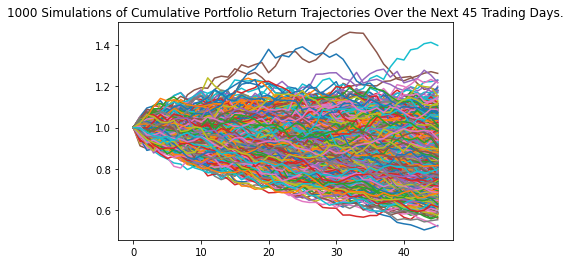

In [51]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
iwp_line_plot = MC_iwp.plot_simulation()

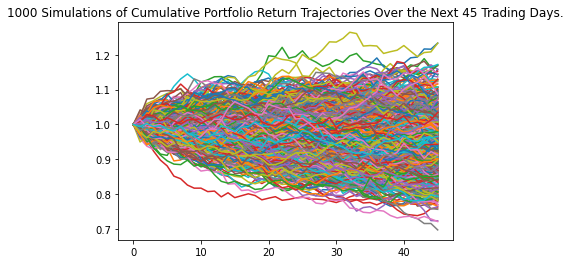

In [52]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
iws_line_plot = MC_iws.plot_simulation()

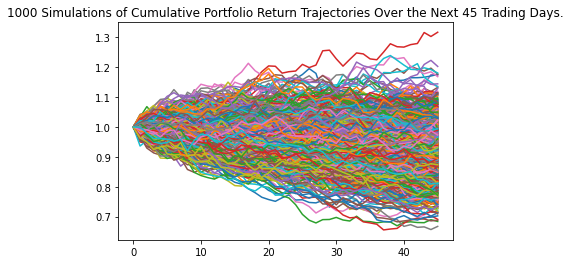

In [53]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
mgc_line_plot = MC_mgc.plot_simulation()

In [ ]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
iwc_line_plot = MC_iwc.plot_simulation()

In [ ]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
btc_iwp_line_plot = MC_btc_iwp.plot_simulation()

In [ ]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
btc_iws_line_plot = MC_btc_iws.plot_simulation()

In [ ]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
btc_mgc_line_plot = MC_btc_mgc.plot_simulation()

In [ ]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
btc_iwc_line_plot = MC_btc_iwc.plot_simulation()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
#btc_distribution_plot = MC_btc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
iwp_distribution_plot = MC_iwp.plot_distribution()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
iws_distribution_plot = MC_iws.plot_distribution()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
mgc_distribution_plot = MC_mgc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
iwc_distribution_plot = MC_iwc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
btc_iwp_distribution_plot = MC_btc_iwp.plot_distribution()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
btc_iws_distribution_plot = MC_btc_iws.plot_distribution()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
btc_mgc_distribution_plot = MC_btc_mgc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
btc_iwc_distribution_plot = MC_btc_iwc.plot_distribution()

In [58]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
#btc_table = MC_btc.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
#print(btc_table)

In [59]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
iwp_table = MC_iwp.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(iwp_table)

count           1000.000000
mean               0.846238
std                0.128477
min                0.521359
25%                0.756998
50%                0.836517
75%                0.929221
max                1.397240
95% CI Lower       0.616497
95% CI Upper       1.119096
Name: 45, dtype: float64


In [60]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
iws_table = MC_iws.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(iws_table)

count           1000.000000
mean               0.945362
std                0.081260
min                0.697323
25%                0.887060
50%                0.944643
75%                0.998573
max                1.233275
95% CI Lower       0.793647
95% CI Upper       1.106701
Name: 45, dtype: float64


In [61]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
mgc_table = MC_mgc.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(mgc_table)

count           1000.000000
mean               0.912003
std                0.090568
min                0.667171
25%                0.854099
50%                0.905385
75%                0.966951
max                1.317398
95% CI Lower       0.748679
95% CI Upper       1.093243
Name: 45, dtype: float64


In [62]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
iwc_table = MC_iwc.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(iwc_table)

count           1000.000000
mean               0.875260
std                0.098223
min                0.622038
25%                0.807174
50%                0.867891
75%                0.937442
max                1.306684
95% CI Lower       0.699177
95% CI Upper       1.085941
Name: 45, dtype: float64


In [63]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
spy_table = MC_spy.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(spy_table)

count           1000.000000
mean               0.915955
std                0.094673
min                0.657671
25%                0.848192
50%                0.905781
75%                0.976231
max                1.265997
95% CI Lower       0.742578
95% CI Upper       1.115432
Name: 45, dtype: float64


In [64]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_iwp_table = MC_btc_iwp.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_iwp_table)

count           1000.000000
mean               0.849866
std                0.120743
min                0.575914
25%                0.758137
50%                0.840808
75%                0.926714
max                1.324506
95% CI Lower       0.636002
95% CI Upper       1.103496
Name: 45, dtype: float64


In [65]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_iws_table = MC_btc_iws.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_iws_table)

count           1000.000000
mean               0.936101
std                0.080643
min                0.670707
25%                0.882535
50%                0.930924
75%                0.984178
max                1.214174
95% CI Lower       0.788185
95% CI Upper       1.116254
Name: 45, dtype: float64


In [66]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_mgc_table = MC_btc_mgc.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_mgc_table)

count           1000.000000
mean               0.899932
std                0.085929
min                0.650273
25%                0.840211
50%                0.897916
75%                0.956543
max                1.156227
95% CI Lower       0.741159
95% CI Upper       1.069753
Name: 45, dtype: float64


In [67]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_iwc_table = MC_btc_iwc.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_iwc_table)

count           1000.000000
mean               0.877446
std                0.093087
min                0.619297
25%                0.809838
50%                0.871371
75%                0.935777
max                1.299262
95% CI Lower       0.717633
95% CI Upper       1.073147
Name: 45, dtype: float64


In [68]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_spy_table = MC_btc_spy.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_spy_table)

count           1000.000000
mean               0.908265
std                0.083834
min                0.647875
25%                0.845749
50%                0.902576
75%                0.963815
max                1.259819
95% CI Lower       0.761227
95% CI Upper       1.087478
Name: 45, dtype: float64


In [69]:
# Print the current balance of the stock and bond portion of the members portfolio
investment = 100000

In [70]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
#ci_lower_cumulative_return = round(btc_table[8] * investment, 2)
#ci_upper_cumulative_return = round(btc_table[9] * investment, 2)

# Print the result of your calculations
#print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
 #     f" with a 100% BTC over the next six months will end within the range of"
#      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

#mean = round(btc_table[1] * investment, 2)
#print(mean)

In [71]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(iwp_table[8] * investment, 2)
ci_upper_cumulative_return = round(iwp_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 100% IWP over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(iwp_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 100% IWP over the next six months will end within the range of $61649.72 and $111909.64.
84623.84


In [72]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(iws_table[8] * investment, 2)
ci_upper_cumulative_return = round(iws_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 100% IWS over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(iws_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 100% IWS over the next six months will end within the range of $79364.69 and $110670.09.
94536.21


In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(mgc_table[8] * investment, 2)
ci_upper_cumulative_return = round(mgc_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 100% MGC over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(mgc_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 100% MGC over the next six months will end within the range of $74867.87 and $109324.27.
91200.31


In [74]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(iwc_table[8] * investment, 2)
ci_upper_cumulative_return = round(iwc_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 100% IWC over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(iwc_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 100% IWC over the next six months will end within the range of $69917.65 and $108594.09.
87526.04


In [75]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(spy_table[8] * investment, 2)
ci_upper_cumulative_return = round(spy_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 100% SPY over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(spy_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 100% SPY over the next six months will end within the range of $74257.77 and $111543.21.
91595.5


In [76]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_iwp_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_iwp_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and IWP respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(btc_iwp_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and IWP respectively over the next six months will end within the range of $63600.16 and $110349.58.
84986.62


In [77]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_iws_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_iws_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and IWS respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(btc_iws_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and IWS respectively over the next six months will end within the range of $78818.49 and $111625.4.
93610.06


In [78]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_mgc_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_mgc_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and MGC respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(btc_mgc_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and MGC respectively over the next six months will end within the range of $74115.89 and $106975.33.
89993.23


In [79]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_iwc_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_iwc_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and IWC respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(btc_iwc_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and IWC respectively over the next six months will end within the range of $71763.31 and $107314.74.
87744.58


In [80]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_spy_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_spy_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and SPY respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

mean = round(btc_spy_table[1] * investment, 2)
print(mean)

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and SPY respectively over the next six months will end within the range of $76122.67 and $108747.81.
90826.51
